In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
#train_A_over_logs = "../eval/20190317_RetinaNet_train_A_over_eval/test"
#train_B_over_logs = "../eval/20190317_RetinaNet_train_B_over_eval/test"
#train_C_over_logs = "../eval/20190317_RetinaNet_train_C_over_eval/test"
#train_A_over_ganaug_025_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_025_eval/test"
#train_A_over_ganaug_050_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_050_eval/test"
#train_A_over_ganaug_050_augonlyasbase_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_eval/test"
#pattern = "/**/*.txt"

train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/1"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/1"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/1"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/1"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/1"
train_A_over_ganaug_050_augonlyasbase_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_class_eval/1"
pattern = "/**/*test_model*.txt"

plot_title = "Impact of GAN-based augmentation: person (test set)"

train_A_over_iteration = 105000 # None = best
train_B_over_iteration = 97500 # None = best
train_C_over_iteration = 65000 # None = best
train_A_over_ganaug_025_iteration = 42500 # None = best
train_A_over_ganaug_050_iteration = 102500 # None = best
train_A_over_ganaug_050_augonlyasbase_iteration = 47500 # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)
train_A_over_ganaug_050_augonlyasbase_logs = glob.glob(train_A_over_ganaug_050_augonlyasbase_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Last (or other specified) iterations ##

### --> All metrics are evaluated on the selected iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
105000,0.244274,0.554443,0.180944,0.096798,0.339836,0.448386,0.107848,0.310448,0.340224,0.199607,0.446686,0.532164


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.244274,0.554443,0.180944,0.096798,0.339836,0.448386,0.107848,0.310448,0.340224,0.199607,0.446686,0.532164


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
97500,0.243261,0.554548,0.184212,0.097364,0.335591,0.453978,0.111076,0.307803,0.337175,0.199509,0.439481,0.535088


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.243261,0.554548,0.184212,0.097364,0.335591,0.453978,0.111076,0.307803,0.337175,0.199509,0.439481,0.535088


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
65000,0.220263,0.528725,0.148717,0.080329,0.307297,0.423464,0.102018,0.290045,0.318341,0.192731,0.410183,0.507602


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.220263,0.528725,0.148717,0.080329,0.307297,0.423464,0.102018,0.290045,0.318341,0.192731,0.410183,0.507602


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.232951,0.522502,0.1746,0.082344,0.336337,0.427955,0.105157,0.306143,0.340045,0.182515,0.46292,0.531579


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.232951,0.522502,0.1746,0.082344,0.336337,0.427955,0.105157,0.306143,0.340045,0.182515,0.46292,0.531579


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
102500,0.236368,0.526171,0.180524,0.085196,0.339709,0.429691,0.108161,0.309058,0.343229,0.197741,0.457637,0.514035


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.236368,0.526171,0.180524,0.085196,0.339709,0.429691,0.108161,0.309058,0.343229,0.197741,0.457637,0.514035


### train_A_over_ganaug_050_augonlyasbase ###

In [20]:
df_train_A_over_ganaug_050_augonlyasbase = logs2df(train_A_over_ganaug_050_augonlyasbase_logs, train_A_over_ganaug_050_augonlyasbase_iteration)
df_train_A_over_ganaug_050_augonlyasbase.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
47500,0.218452,0.501322,0.151577,0.076724,0.312442,0.414012,0.102691,0.283274,0.313767,0.175639,0.418444,0.501754


In [21]:
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric = df_train_A_over_ganaug_050_augonlyasbase.idxmax().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500,47500


In [22]:
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric = df_train_A_over_ganaug_050_augonlyasbase.max().to_frame().T
df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.218452,0.501322,0.151577,0.076724,0.312442,0.414012,0.102691,0.283274,0.313767,0.175639,0.418444,0.501754


## Improvements ##

### train_A_over --> train_B_over ###

In [23]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.001014,0.000105,0.003268,0.000566,-0.004245,0.005592,0.003229,-0.002646,-0.003049,-0.000098,-0.007205,0.002924,A to B


In [24]:
df_train_A_over_TO_train_B_over_rel = (df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over_rel["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.004149,0.000189,0.018061,0.005844,-0.012492,0.012471,0.029938,-0.008522,-0.008963,-0.000492,-0.016129,0.005495,A to B


### train_A_over --> train_C_over ###

In [25]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over["Comparison"] = "Day to Day-R50-Real"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.024011,-0.025719,-0.032227,-0.016469,-0.032539,-0.024922,-0.00583,-0.020404,-0.021883,-0.006876,-0.036503,-0.024561,Day to Day-R50-Real


In [26]:
df_train_A_over_TO_train_C_over_rel = (df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_C_over_rel["Comparison"] = "day to day_r50real"
df_train_A_over_TO_train_C_over_rel["Comparison"] = "Day to Day-R50-Real"
df_train_A_over_TO_train_C_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.098296,-0.046386,-0.178104,-0.170135,-0.09575,-0.055582,-0.054054,-0.065723,-0.064321,-0.034449,-0.08172,-0.046154,Day to Day-R50-Real


### train_A_over --> train_A_over_ganaug_025 ###

In [27]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.011323,-0.031941,-0.006344,-0.014454,-0.003499,-0.020432,-0.002691,-0.004305,-0.000179,-0.017092,0.016234,-0.000585,A to A25


In [28]:
df_train_A_over_TO_train_A_over_ganaug_025_rel = (df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025_rel["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.046355,-0.057609,-0.035059,-0.149323,-0.010295,-0.045567,-0.024948,-0.013867,-0.000527,-0.08563,0.036344,-0.001099,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [29]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "Day to Day-R50-Fake"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.007906,-0.028272,-0.000419,-0.011602,-0.000127,-0.018696,0.000314,-0.00139,0.003004,-0.001866,0.010951,-0.018129,Day to Day-R50-Fake


In [30]:
df_train_A_over_TO_train_A_over_ganaug_050_rel = (df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric) / df_train_A_over_best_val_per_metric
#df_train_A_over_TO_train_A_over_ganaug_050_rel["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050_rel["Comparison"] = "Day to Day-R50-Fake"
df_train_A_over_TO_train_A_over_ganaug_050_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.032366,-0.050992,-0.002318,-0.119855,-0.000372,-0.041695,0.002911,-0.004478,0.008831,-0.00935,0.024516,-0.034066,Day to Day-R50-Fake


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_025 ###

In [31]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025["Comparison"] = "A50aoab to A25"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.014499,0.021181,0.023022,0.00562,0.023895,0.013943,0.002466,0.02287,0.026278,0.006876,0.044476,0.029825,A50aoab to A25


In [32]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel = (df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel["Comparison"] = "A50aoab to A25"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.066374,0.04225,0.151885,0.073254,0.076478,0.033677,0.024017,0.080735,0.08375,0.03915,0.10629,0.059441,A50aoab to A25


### train_A_over_ganaug_050_augonlyasbase --> train_A_over_ganaug_050 ###

In [33]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050["Comparison"] = "A50aoab to A50"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050["Comparison"] = "Day/2 to Day-A50-Fake"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.017917,0.024849,0.028947,0.008473,0.027267,0.015679,0.005471,0.025785,0.029462,0.022102,0.039193,0.012281,Day/2 to Day-A50-Fake


In [34]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel = (df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel["Comparison"] = "A50aoab to A50"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel["Comparison"] = "Day/2 to Day-A50-Fake"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.082016,0.049568,0.190969,0.110433,0.08727,0.037871,0.053275,0.091024,0.093897,0.125839,0.093664,0.024476,Day/2 to Day-A50-Fake


### train_A_over_ganaug_050_augonlyasbase --> train_C ###

In [35]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over["Comparison"] = "A50aoab to C"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over["Comparison"] = "Day/2 to Day-A50-Real"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.001812,0.027403,-0.002861,0.003606,-0.005146,0.009452,-0.000673,0.006771,0.004574,0.017092,-0.008261,0.005848,Day/2 to Day-A50-Real


In [36]:
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel = (df_train_C_over_best_val_per_metric - df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric) / df_train_A_over_ganaug_050_augonlyasbase_best_val_per_metric
#df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel["Comparison"] = "A50aoab to C"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel["Comparison"] = "Day/2 to Day-A50-Real"
df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.008293,0.054662,-0.018873,0.046997,-0.016469,0.022831,-0.00655,0.023904,0.014578,0.097315,-0.019743,0.011655,Day/2 to Day-A50-Real


## Combine ##

In [37]:
#df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_025, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050], axis = 0)
df_combined = pd.concat([df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_050, df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050], axis = 0)
df_combined_rel = pd.concat([df_train_A_over_TO_train_C_over_rel, df_train_A_over_TO_train_A_over_ganaug_050_rel, df_train_A_over_ganaug_050_augonlyasbase_TO_train_C_over_rel, df_train_A_over_ganaug_050_augonlyasbase_TO_train_A_over_ganaug_050_rel], axis = 0)

In [38]:
df_combined = df_combined.set_index("Comparison")
df_combined.head()

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
Day to Day-R50-Real,-0.024011,-0.025719,-0.032227,-0.016469,-0.032539,-0.024922,-0.005830,-0.020404,-0.021883,-0.006876,-0.036503,-0.024561
Day to Day-R50-Fake,-0.007906,-0.028272,-0.000419,-0.011602,-0.000127,-0.018696,0.000314,-0.001390,0.003004,-0.001866,0.010951,-0.018129
Day/2 to Day-A50-Real,0.001812,0.027403,-0.002861,0.003606,-0.005146,0.009452,-0.000673,0.006771,0.004574,0.017092,-0.008261,0.005848
Day/2 to Day-A50-Fake,0.017917,0.024849,0.028947,0.008473,0.027267,0.015679,0.005471,0.025785,0.029462,0.022102,0.039193,0.012281


In [39]:
df_combined_rel = df_combined_rel.set_index("Comparison")
df_combined_rel.head()

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
Day to Day-R50-Real,-0.098296,-0.046386,-0.178104,-0.170135,-0.095750,-0.055582,-0.054054,-0.065723,-0.064321,-0.034449,-0.081720,-0.046154
Day to Day-R50-Fake,-0.032366,-0.050992,-0.002318,-0.119855,-0.000372,-0.041695,0.002911,-0.004478,0.008831,-0.009350,0.024516,-0.034066
Day/2 to Day-A50-Real,0.008293,0.054662,-0.018873,0.046997,-0.016469,0.022831,-0.006550,0.023904,0.014578,0.097315,-0.019743,0.011655
Day/2 to Day-A50-Fake,0.082016,0.049568,0.190969,0.110433,0.087270,0.037871,0.053275,0.091024,0.093897,0.125839,0.093664,0.024476


Text(0, 0.5, 'Absolute change in score')

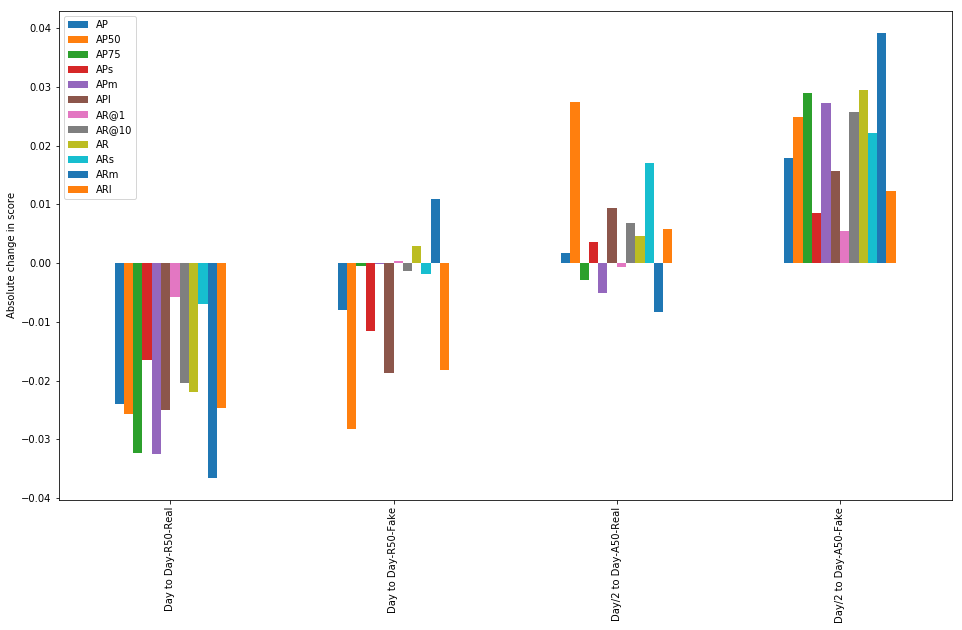

In [40]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [41]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [42]:
df_combined_rel = df_combined_rel * 100

Text(0, 0.5, 'Relative change in score (%)')

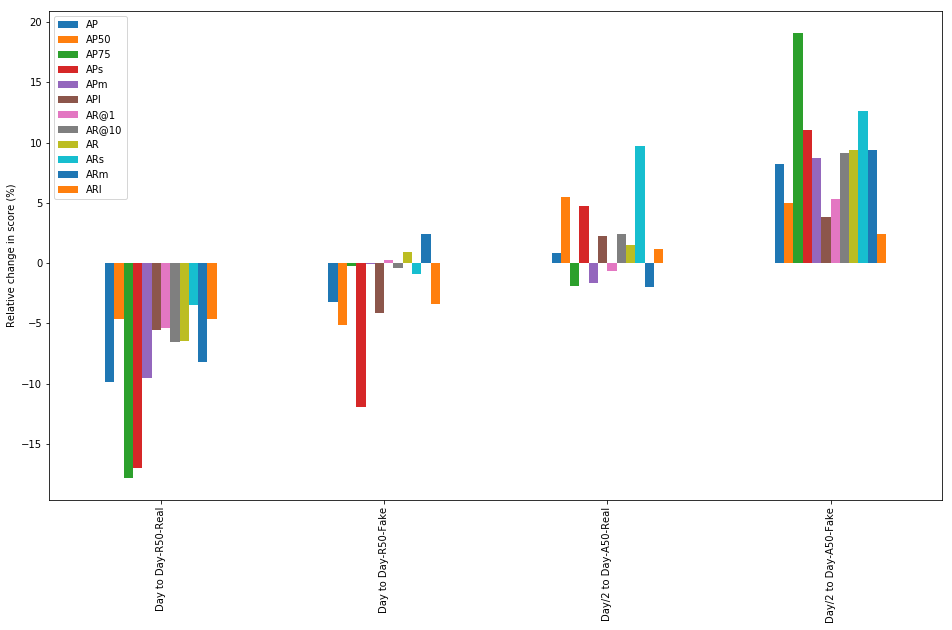

In [43]:
ax = df_combined_rel.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Relative change in score (%)")

In [44]:
layout = {
    "title": plot_title,
    "titlefont": {
        "size": 28
    },    
    "xaxis": {
        "tickfont": {
            "size": 18
        }
    },    
    "yaxis": {
        "title": "Relative score change (%)",
        "range": [-30, 30],
        "dtick": 5,
        "titlefont": {
            "size": 20
        },
        "tickfont": {
            "size": 18
        }
    },
    "width": 1024,
    "height": 768,
    "legend": {
        "x": 0.13,
        "y": -0.07,
        "orientation": "h",
        "font": {
            "size": 18,
        },        
    }
}

fig = df_combined_rel.iplot(kind = "bar", y = ["AP", "APs", "APm", "APl", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)